In [93]:
#import Useful Library
import pandas as pd
import numpy as np

In [94]:
#for making graph
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
#for warnings
import warnings
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv('Mall_Customers.csv')

In [97]:
df.columns = ['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','ProductId','Ratings','Timestamp']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   ProductId               200 non-null    object
 6   Ratings                 200 non-null    int64 
 7   Timestamp               200 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 12.6+ KB


In [98]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,1,Male,19,15,39,B00008NJEP,1,1230249600
1,2,Male,21,15,81,132793040,4,1143072000
2,3,Female,20,16,6,321732944,5,1195516800
3,4,Female,23,16,77,439886341,4,1159833600
4,5,Female,31,17,40,439886341,2,1175731200


(4.0, 0.0)

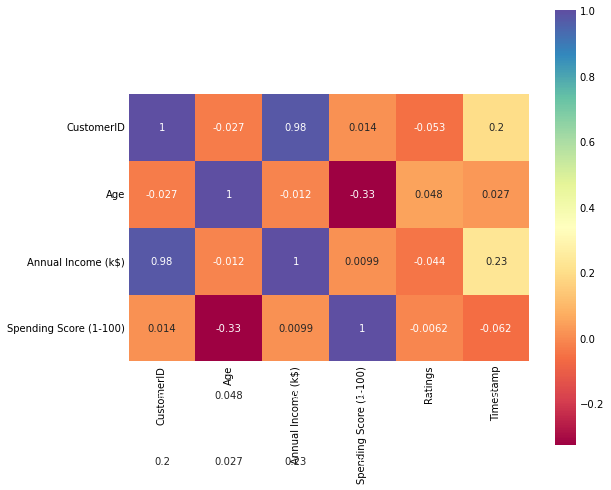

In [99]:
#g. Correlation – Heatmap

plt.figure(figsize =(8,8))
#ax.set_ylim(4.0, 0)
ax= sns.heatmap(df.corr(),square = True, annot = True,cmap= 'Spectral' )
ax.set_ylim(4.0, 0)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

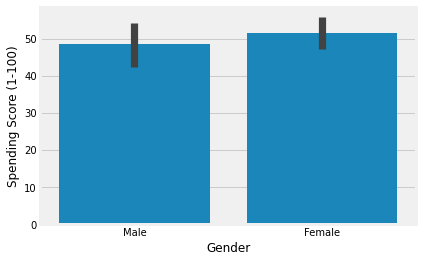

In [100]:
col = sns.color_palette()[0]
sns.barplot(x="Gender", y="Spending Score (1-100)", data=df, color=col)

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

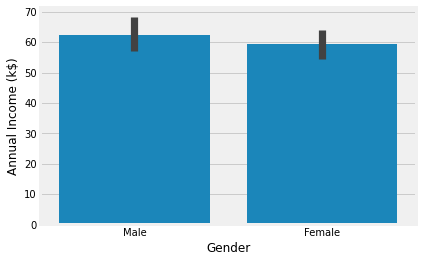

In [101]:
sns.barplot(x="Gender", y="Annual Income (k$)", data=df, color=col)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

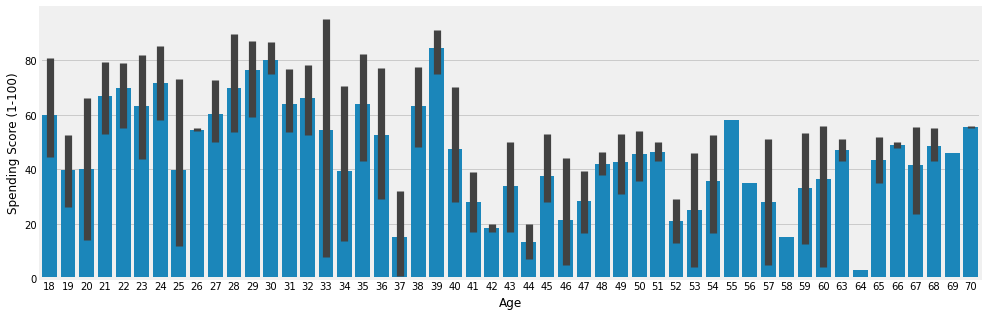

In [102]:
plt.figure(figsize=(15,5))
sns.barplot(x="Age", y="Spending Score (1-100)", data=df, color=col)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

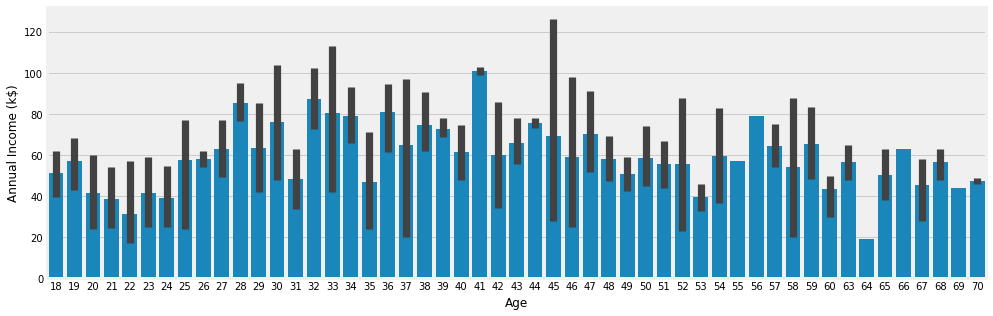

In [103]:
plt.figure(figsize=(15,5))
sns.barplot(x="Age", y="Annual Income (k$)", data=df, color=col)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

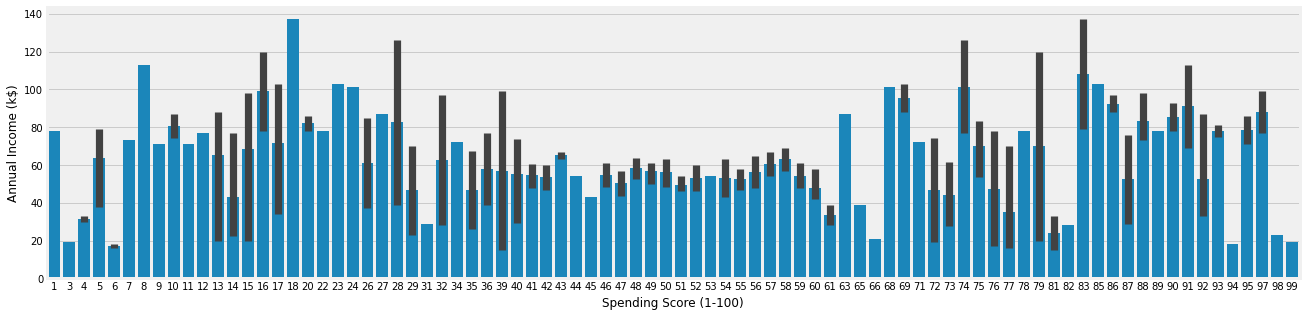

In [104]:
plt.figure(figsize=(20,5))
sns.barplot(x="Spending Score (1-100)", y="Annual Income (k$)", data=df, color=col)

<Figure size 720x720 with 0 Axes>

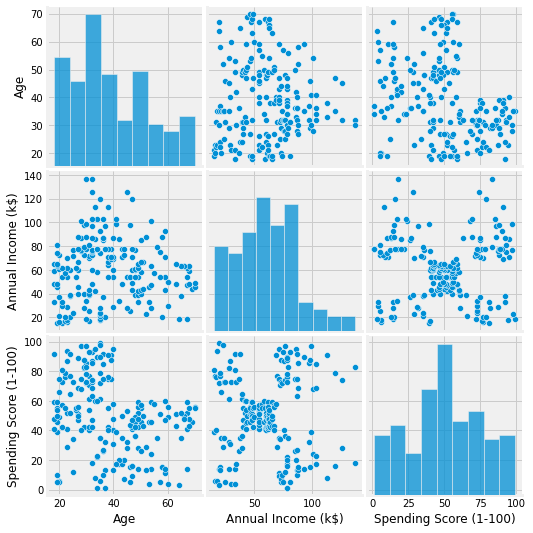

In [105]:
#j. Pair plot
plt.figure(figsize=(10,10))
sns.pairplot(df, vars=["Age", "Annual Income (k$)","Spending Score (1-100)"])

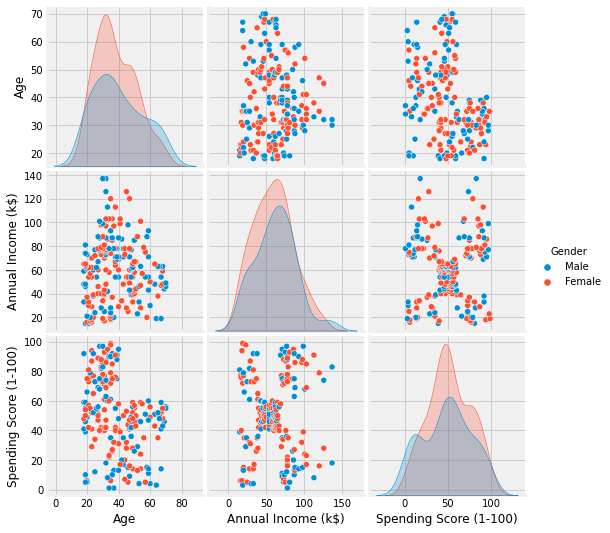

In [106]:
sns.pairplot(df, vars=["Age", "Annual Income (k$)","Spending Score (1-100)"], hue = "Gender")

In [107]:
x1 = df.loc[:, ["Age","Spending Score (1-100)"]].values
x1.shape

(200, 2)

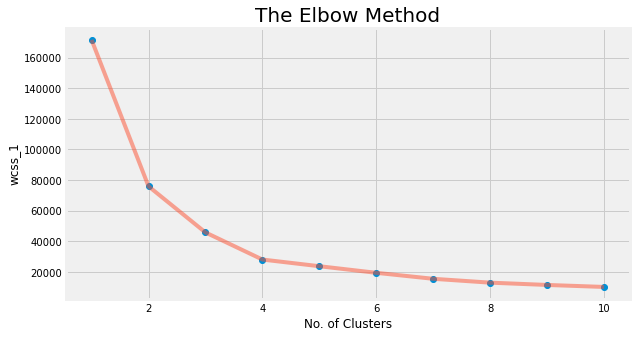

In [108]:
#Using Elbow method to find the optiminal cluster number
from sklearn.cluster import KMeans
wcss_1 = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x1)
    wcss_1.append(km.inertia_)
    
plt.figure(figsize = (9 ,5))
plt.plot(np.arange(1 , 11) , wcss_1 , 'o')
plt.plot(np.arange(1 , 11) , wcss_1 , '-' , alpha = 0.5)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss_1')
plt.show()

In [109]:
kmeans_1=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans_1=kmeans_1.fit_predict(x1)
y_kmeans_1

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

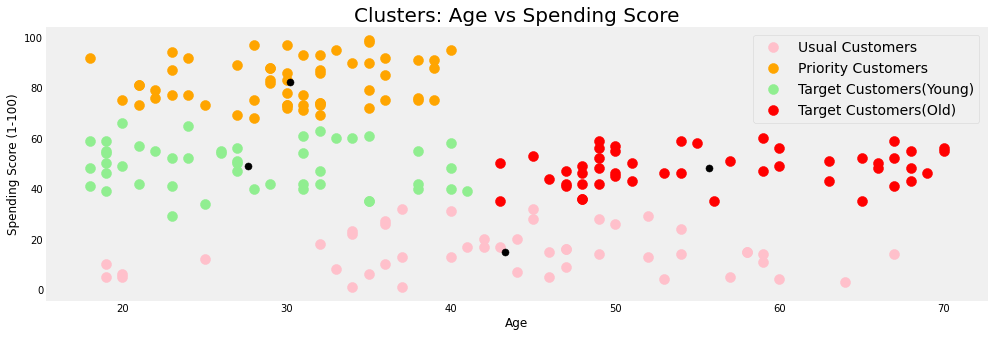

In [110]:
labels_1= kmeans_1.labels_
centroids_1 = kmeans_1.cluster_centers_

#Visualizing the clusters : : 2-D Scatter plot

plt.figure(figsize=(15,5))
plt.title('Clusters: Age vs Spending Score', fontsize = 20)

plt.scatter(x1[y_kmeans_1 == 0, 0], x1[y_kmeans_1 == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x1[y_kmeans_1 == 1, 0], x1[y_kmeans_1 == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x1[y_kmeans_1 == 2, 0], x1[y_kmeans_1 == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x1[y_kmeans_1 == 3, 0], x1[y_kmeans_1 == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(centroids_1[:, 0],centroids_1[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [111]:
kmeans_1=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans_1=kmeans_1.fit_predict(x1)
cluster_map=pd.DataFrame()
cluster_map['data_index']=df.index.values
cluster_map['cluster']=kmeans_1.labels_
labels_1 = kmeans_1.labels_
centroids_1 = kmeans_1.cluster_centers_
labels_1
print(labels_1)
print(y_kmeans_1)
lst0=cluster_map[cluster_map.cluster==0].values
opt0=pd.DataFrame()
for i in lst0:
    opt0=opt0.append(dict(df.loc[i[0]-1]),ignore_index=True)
opt0.head(100)


[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,2.0,Male,21.0,15.0,81.0,132793040,4.0,1.143072e+09
1,6.0,Female,22.0,17.0,76.0,439886341,4.0,1.311379e+09
2,8.0,Female,23.0,18.0,94.0,511189877,5.0,1.323734e+09
3,10.0,Female,30.0,19.0,72.0,511189877,5.0,1.385338e+09
4,12.0,Female,35.0,19.0,99.0,511189877,5.0,1.257206e+09
5,14.0,Female,24.0,20.0,77.0,528881469,5.0,1.353974e+09
6,18.0,Male,20.0,21.0,66.0,528881469,5.0,1.188346e+09
7,22.0,Male,25.0,24.0,73.0,B0001M3612,5.0,1.173312e+09
8,24.0,Male,31.0,25.0,73.0,B0001M3612,1.0,1.173226e+09
9,26.0,Male,29.0,28.0,82.0,B0001M396Y,5.0,1.256947e+09


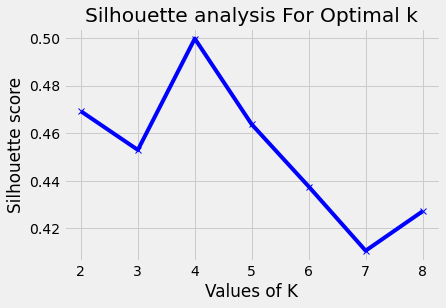

In [112]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans_1 = KMeans(n_clusters=num_clusters)
 kmeans_1.fit(x1)
 cluster_labels = kmeans_1.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(x1, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [21]:
lst1=cluster_map[cluster_map.cluster==1].values
opt1=pd.DataFrame()
for i in lst1:
    opt1=opt1.append(dict(df.loc[i[0]-1]),ignore_index=True)
opt1.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,1.0,Male,19.0,15.0,39.0,B00008NJEP,1.0,1.230250e+09
1,3.0,Female,20.0,16.0,6.0,321732944,5.0,1.195517e+09
2,5.0,Female,31.0,17.0,40.0,439886341,2.0,1.175731e+09
3,7.0,Female,35.0,18.0,6.0,511189877,5.0,1.144109e+09
4,9.0,Male,64.0,19.0,3.0,511189877,2.0,1.403914e+09
5,11.0,Male,67.0,19.0,14.0,511189877,3.0,1.218758e+09
6,13.0,Female,58.0,20.0,15.0,528881469,5.0,1.363910e+09
7,15.0,Male,37.0,20.0,13.0,528881469,5.0,1.192234e+09
8,19.0,Male,52.0,23.0,29.0,528881469,4.0,1.162426e+09
9,21.0,Male,35.0,24.0,35.0,B0001M3612,5.0,1.173571e+09


In [22]:
lst2=cluster_map[cluster_map.cluster==2].values
opt2=pd.DataFrame()
for i in lst2:
    opt2=opt2.append(dict(df.loc[i[0]+1]),ignore_index=True)
opt2.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,2.0,Male,21.0,15.0,81.0,132793040,4.0,1.143072e+09
1,6.0,Female,22.0,17.0,76.0,439886341,4.0,1.311379e+09
2,18.0,Male,20.0,21.0,66.0,528881469,5.0,1.188346e+09
3,19.0,Male,52.0,23.0,29.0,528881469,4.0,1.162426e+09
4,22.0,Male,25.0,24.0,73.0,B0001M3612,5.0,1.173312e+09
5,29.0,Female,40.0,29.0,31.0,B0001M3MVG,3.0,1.198195e+09
6,45.0,Female,49.0,39.0,28.0,B00005T3BD,5.0,1.312157e+09
7,47.0,Female,50.0,40.0,55.0,594012015,5.0,1.405123e+09
8,49.0,Female,29.0,40.0,42.0,594012015,4.0,1.287187e+09
9,50.0,Female,31.0,40.0,42.0,594012015,4.0,1.392682e+09


In [23]:
lst3=cluster_map[cluster_map.cluster==3].values
opt3=pd.DataFrame()
for i in lst3:
    opt3=opt3.append(dict(df.loc[i[0]-1]),ignore_index=True)
opt3.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,40.0,Female,20.0,37.0,75.0,558835155,5.0,1.170202e+09
1,42.0,Male,24.0,38.0,92.0,B00005T3BD,5.0,1.360368e+09
2,46.0,Female,24.0,39.0,65.0,B00005T3BD,3.0,1.337040e+09
3,50.0,Female,31.0,40.0,42.0,594012015,4.0,1.392682e+09
4,53.0,Female,31.0,43.0,54.0,594017580,5.0,1.402618e+09
5,54.0,Male,59.0,43.0,60.0,B0001M2AVE,5.0,1.380067e+09
6,55.0,Female,50.0,43.0,45.0,B0001M2AVE,4.0,1.209168e+09
7,56.0,Male,47.0,43.0,41.0,B0001M2AXC,2.0,1.361232e+09
8,57.0,Female,51.0,44.0,50.0,B0001M2AXC,3.0,1.346803e+09
9,59.0,Female,27.0,46.0,51.0,B0001M2AXC,5.0,1.183162e+09


In [24]:
x3 = df.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values
x3.shape

(200, 2)

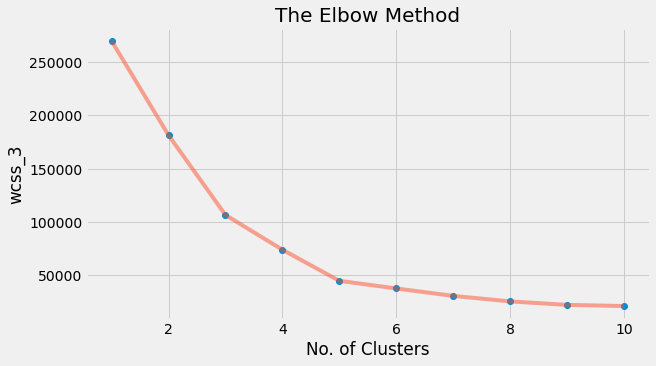

In [25]:
wcss_3 = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x3)
    wcss_3.append(km.inertia_)
    
#Using Elbow method to find the optiminal cluster number

plt.figure(figsize = (9 ,5))
plt.plot(np.arange(1 , 11) , wcss_3 , 'o')
plt.plot(np.arange(1 , 11) , wcss_3 , '-' , alpha = 0.5)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss_3')
plt.show()

In [26]:
kmeans_3=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans_3=kmeans_3.fit_predict(x3)
y_kmeans_3
labels_3 = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_

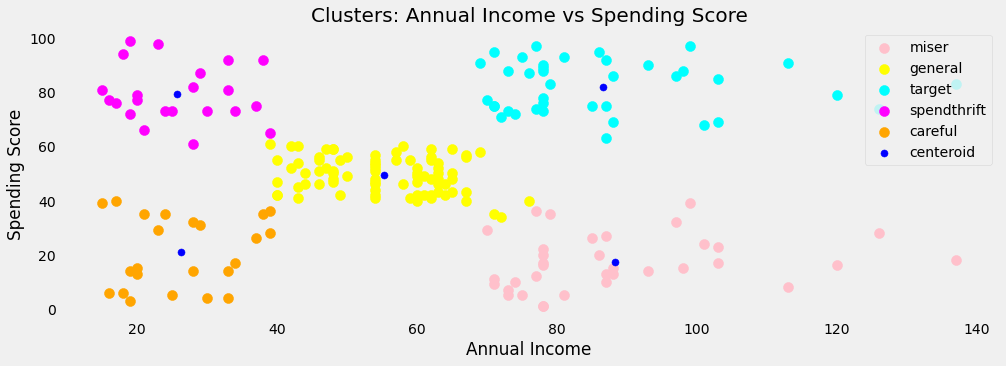

In [27]:
#Visualizing the clusters : 2-D Scatter plot
labels_3 = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_

#Visualizing the clusters : 2-D Scatter plot
plt.figure(figsize=(15,5))
plt.scatter(x3[y_kmeans_3 == 0, 0], x3[y_kmeans_3 == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x3[y_kmeans_3 == 1, 0], x3[y_kmeans_3 == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x3[y_kmeans_3 == 2, 0], x3[y_kmeans_3 == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x3[y_kmeans_3 == 3, 0], x3[y_kmeans_3 == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x3[y_kmeans_3 == 4, 0], x3[y_kmeans_3 == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(centroids_3[:,0], centroids_3[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Clusters: Annual Income vs Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

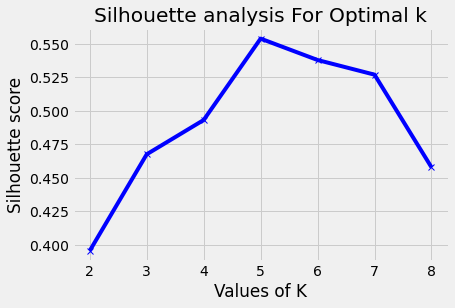

In [28]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(x3)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(x3, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [29]:
kmeans_3=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans_3=kmeans_3.fit_predict(x3)
cluster_map=pd.DataFrame()
cluster_map['data_index']=df.index.values
cluster_map['cluster']=kmeans_3.labels_
labels_3 = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_
labels_3
print(labels_3)
print(y_kmeans_3)
lsttt0=cluster_map[cluster_map.cluster==0].values
opttt0=pd.DataFrame()
for i in lsttt0:
    opttt0=opttt0.append(dict(df.loc[i[0]-1]),ignore_index=True)
opttt0.head(100)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,124.0,Male,39.0,69.0,91.0,B0001LTT5K,3.0,1.323475e+09
1,128.0,Male,40.0,71.0,95.0,B0001LTT5K,4.0,1.240445e+09
2,130.0,Male,38.0,71.0,75.0,B0001LTT5K,5.0,1.292717e+09
3,134.0,Female,31.0,72.0,71.0,B0001LTT64,5.0,1.378253e+09
4,136.0,Female,29.0,73.0,88.0,B0001LTT64,5.0,1.381882e+09
5,138.0,Male,32.0,73.0,73.0,594481902,5.0,1.403050e+09
6,140.0,Female,35.0,74.0,72.0,594481902,2.0,1.303517e+09
7,144.0,Female,32.0,76.0,87.0,594481902,4.0,1.377130e+09
8,146.0,Male,28.0,77.0,97.0,594481902,3.0,1.173830e+09
9,148.0,Female,32.0,77.0,74.0,594481902,4.0,1.207786e+09


In [30]:
lsttt1=cluster_map[cluster_map.cluster==1].values
opttt1=pd.DataFrame()
for i in lsttt1:
    opttt1=opttt1.append(dict(df.loc[i[0]-1]),ignore_index=True)
opttt1.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,43.0,Male,48.0,39.0,36.0,B00005T3BD,5.0,1.290989e+09
1,46.0,Female,24.0,39.0,65.0,B00005T3BD,3.0,1.337040e+09
2,47.0,Female,50.0,40.0,55.0,594012015,5.0,1.405123e+09
3,48.0,Female,27.0,40.0,47.0,594012015,4.0,1.319933e+09
4,49.0,Female,29.0,40.0,42.0,594012015,4.0,1.287187e+09
...,...,...,...,...,...,...,...,...
76,121.0,Male,27.0,67.0,56.0,594481813,4.0,1.399853e+09
77,122.0,Female,38.0,67.0,40.0,594481813,4.0,1.326067e+09
78,126.0,Female,31.0,70.0,77.0,B0001LTT5K,5.0,1.389485e+09
79,132.0,Male,39.0,71.0,75.0,B0001LTT5K,5.0,1.195690e+09


In [31]:
lsttt2=cluster_map[cluster_map.cluster==2].values
opttt2=pd.DataFrame()
for i in lsttt2:
    opttt2=opttt2.append(dict(df.loc[i[0]-1]),ignore_index=True)
opttt2.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,123.0,Female,40.0,69.0,58.0,594481813,4.0,1.138493e+09
1,125.0,Female,23.0,70.0,29.0,B0001LTT5K,2.0,1.400112e+09
2,127.0,Male,43.0,71.0,35.0,B0001LTT5K,5.0,1.311379e+09
3,129.0,Male,59.0,71.0,11.0,B0001LTT5K,1.0,1.396570e+09
4,131.0,Male,47.0,71.0,9.0,B0001LTT5K,4.0,1.334016e+09
5,133.0,Female,25.0,72.0,34.0,B0001LTT5K,5.0,1.363651e+09
6,135.0,Male,20.0,73.0,5.0,B0001LTT64,2.0,1.379894e+09
7,137.0,Female,44.0,73.0,7.0,594481902,2.0,1.373501e+09
8,139.0,Male,19.0,74.0,10.0,594481902,3.0,1.339027e+09
9,141.0,Female,57.0,75.0,5.0,594481902,5.0,1.306627e+09


In [32]:
lsttt3=cluster_map[cluster_map.cluster==3].values
opttt3=pd.DataFrame()
for i in lsttt3:
    opttt3=opttt3.append(dict(df.loc[i[0]-1]),ignore_index=True)
opttt3.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,1.0,Male,19.0,15.0,39.0,B00008NJEP,1.0,1.230250e+09
1,3.0,Female,20.0,16.0,6.0,321732944,5.0,1.195517e+09
2,5.0,Female,31.0,17.0,40.0,439886341,2.0,1.175731e+09
3,7.0,Female,35.0,18.0,6.0,511189877,5.0,1.144109e+09
4,9.0,Male,64.0,19.0,3.0,511189877,2.0,1.403914e+09
5,11.0,Male,67.0,19.0,14.0,511189877,3.0,1.218758e+09
6,13.0,Female,58.0,20.0,15.0,528881469,5.0,1.363910e+09
7,15.0,Male,37.0,20.0,13.0,528881469,5.0,1.192234e+09
8,17.0,Female,35.0,21.0,35.0,528881469,5.0,1.236989e+09
9,19.0,Male,52.0,23.0,29.0,528881469,4.0,1.162426e+09


In [33]:
lsttt4=cluster_map[cluster_map.cluster==4].values
opttt4=pd.DataFrame()
for i in lsttt4:
    opttt4=opttt4.append(dict(df.loc[i[0]+1]),ignore_index=True)
opttt4.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,2.0,Male,21.0,15.0,81.0,132793040,4.0,1.143072e+09
1,4.0,Female,23.0,16.0,77.0,439886341,4.0,1.159834e+09
2,6.0,Female,22.0,17.0,76.0,439886341,4.0,1.311379e+09
3,8.0,Female,23.0,18.0,94.0,511189877,5.0,1.323734e+09
4,10.0,Female,30.0,19.0,72.0,511189877,5.0,1.385338e+09
5,12.0,Female,35.0,19.0,99.0,511189877,5.0,1.257206e+09
6,14.0,Female,24.0,20.0,77.0,528881469,5.0,1.353974e+09
7,16.0,Male,22.0,20.0,79.0,528881469,5.0,1.224806e+09
8,18.0,Male,20.0,21.0,66.0,528881469,5.0,1.188346e+09
9,20.0,Female,35.0,23.0,98.0,B0001M3612,5.0,1.229040e+09


In [36]:
opt0.head(100)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ProductId,Ratings,Timestamp
0,2.0,Male,21.0,15.0,81.0,132793040,4.0,1.143072e+09
1,6.0,Female,22.0,17.0,76.0,439886341,4.0,1.311379e+09
2,8.0,Female,23.0,18.0,94.0,511189877,5.0,1.323734e+09
3,10.0,Female,30.0,19.0,72.0,511189877,5.0,1.385338e+09
4,12.0,Female,35.0,19.0,99.0,511189877,5.0,1.257206e+09
5,14.0,Female,24.0,20.0,77.0,528881469,5.0,1.353974e+09
6,18.0,Male,20.0,21.0,66.0,528881469,5.0,1.188346e+09
7,22.0,Male,25.0,24.0,73.0,B0001M3612,5.0,1.173312e+09
8,24.0,Male,31.0,25.0,73.0,B0001M3612,1.0,1.173226e+09
9,26.0,Male,29.0,28.0,82.0,B0001M396Y,5.0,1.256947e+09


In [37]:
data1 = opt0.head(100)

In [38]:
ratings_utility_matrix = data1.pivot_table(values='Ratings', index='CustomerID', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,132793040,439886341,511189877,528881469,594481902,594511488,594514681,594514789,594549558,743610431,...,B0000DZEZ9,B0001LS0ZU,B0001LS35W,B0001LSDUC,B0001LSDUM,B0001LTT5K,B0001LTT64,B0001M3612,B0001M396Y,B0001M3MVG
CustomerID,,,,,,,,,,,,,,,,,,,,,
2.0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12.0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
ratings_utility_matrix.shape

(39, 22)

In [81]:
X = ratings_utility_matrix.T
X.head(23)

CustomerID,123.0,125.0,127.0,129.0,131.0,133.0,135.0,137.0,139.0,141.0,...,181.0,183.0,185.0,187.0,189.0,191.0,193.0,195.0,197.0,199.0
ProductId,,,,,,,,,,,,,,,,,,,,,
594481813,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594481902,0,0,0,0,0,0,0,2,3,5,...,0,0,0,0,0,0,0,0,0,0
594482127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594511488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594514681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594549507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743610431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777700018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840017677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
X.shape

(22, 39)

In [83]:
X1 = X

In [84]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(22, 10)

In [79]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape


(22, 22)

In [88]:
X.index[19]

'B0001LSDWU'

In [71]:
i = "B0001LSDWU"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

19

In [72]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(22,)

In [75]:
Recommend = list(X.index[correlation_product_ID > 0.30])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:3]

['743610431', '777700018', '879393742']

In [49]:
data2 = opt1.head(100)
ratings_utility_matrix = data2.pivot_table(values='Ratings', index='CustomerID', columns='ProductId', fill_value=0)
X = ratings_utility_matrix.T
X1 = X
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape


(29, 29)

In [50]:
X.index[19]

'B0000DZEZ9'

In [51]:
i = "B0000DZEZ9"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.50])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:5]

['511189877', 'B0001LSDTI', 'B0001LSDUM']

In [52]:
data4 = opt3.head(100)
ratings_utility_matrix = data4.pivot_table(values='Ratings', index='CustomerID', columns='ProductId', fill_value=0)
X = ratings_utility_matrix.T
X1 = X
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(23, 23)

In [53]:
X.index[19]

'B0001LXQFO'

In [54]:
i = "B0001LXQFO"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.30])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:3]

['558835155', '594017580', '594202442']

In [55]:
data11 = opttt0.head(100)
ratings_utility_matrix = data11.pivot_table(values='Ratings', index='CustomerID', columns='ProductId', fill_value=0)
X = ratings_utility_matrix.T
X1 = X
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(19, 19)

In [56]:
X.index[15]

'B0001LSDUC'

In [57]:
i = "B0001LSDUC"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.50])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:5]

['B00008NJEP']

In [58]:
data12 = opttt1.head(100)
ratings_utility_matrix = data12.pivot_table(values='Ratings', index='CustomerID', columns='ProductId', fill_value=0)
X = ratings_utility_matrix.T
X1 = X
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(24, 24)

In [59]:
X.index[13]

'B00005T3BD'

In [60]:
i = "B00005T3BD"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.40])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:4]

['594033926', '594033934', '594202442', '594450705']

In [61]:
data13 = opttt2.head(100)
ratings_utility_matrix = data13.pivot_table(values='Ratings', index='CustomerID', columns='ProductId', fill_value=0)
X = ratings_utility_matrix.T
X1 = X
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(22, 22)

In [62]:
X.index[13]

'B0000DZEZ8'

In [63]:
i = "B0000DZEZ8"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.20])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:2]

['594481813', '594511488']